Training
Using the Naive Bayes classificator to predict if a word is an answer or not.

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/task2/Question-Generator/Data
!ls

/content/drive/MyDrive/task2/Question-Generator/Data
dev-v1.1.json	   glove.6B.300d.txt  train-v1.1.json
distractor.pkl	   glove.6B.50d.txt   word2vec-glove.6B.300d.txt
glove.6B.100d.txt  glove.6B.zip       wordsDf.pkl
glove.6B.200d.txt  nb-predictor.pkl


In [7]:
import pandas as pd
import numpy as np

In [8]:
!pip install pickle5
import pickle5 as cPickle
from pathlib import Path

def dumpPickle(fileName, content):
    pickleFile = open(fileName, 'wb')
    cPickle.dump(content, pickleFile, -1)
    pickleFile.close()

def loadPickle(fileName):    
    file = open(fileName, 'rb')
    content = cPickle.load(file)
    file.close()
    
    return content
    
def pickleExists(fileName):
    file = Path(fileName)
    
    if file.is_file():
        return True
    
    return False

Reading the dataframe

In [16]:
wordPickleName = 'wordsDf.pkl'
df = loadPickle(wordPickleName)

In [17]:
df.head()

,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,NER,POS,TAG,DEP,shape
0,Architecturally,False,0,0,0.0,1,None,ADV,RB,advmod,Xxxxx
1,school,False,0,0,0.0,1,None,NOUN,NN,nsubj,xxxx
2,Catholic,False,0,0,0.0,1,NORP,None,None,None,Xxxxx
3,character,False,0,0,0.0,1,None,NOUN,NN,dobj,xxxx
4,Atop,False,0,0,1.0,1,None,ADP,IN,prep,Xxxx


One-hot encoding
We had to encode the categorical data - NER, POS, TAG, DEP, shape

In [18]:
columnsToEncode = ['NER', 'POS', "TAG", 'DEP']

In [19]:
for column in columnsToEncode:
    print(column)
    one_hot = pd.get_dummies(df[column])
    one_hot = one_hot.add_prefix(column + '_')

    df = df.drop(column, axis = 1)
    df = df.join(one_hot)

NER
POS
TAG
DEP


In [20]:
df.head()

,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,shape,NER_CARDINAL,NER_DATE,NER_EVENT,NER_FAC,NER_GPE,NER_LANGUAGE,NER_LAW,NER_LOC,NER_MONEY,NER_NORP,NER_ORDINAL,NER_ORG,NER_PERCENT,NER_PERSON,NER_PRODUCT,NER_QUANTITY,NER_TIME,NER_WORK_OF_ART,POS_ADJ,POS_ADP,POS_ADV,POS_CCONJ,POS_DET,POS_NOUN,POS_NUM,POS_PROPN,POS_SCONJ,POS_VERB,TAG_CC,TAG_CD,TAG_IN,TAG_JJ,TAG_JJR,...,TAG_RBR,TAG_RBS,TAG_VB,TAG_VBD,TAG_VBG,TAG_VBN,TAG_VBP,TAG_VBZ,DEP_ROOT,DEP_acl,DEP_acomp,DEP_advcl,DEP_advmod,DEP_agent,DEP_amod,DEP_appos,DEP_attr,DEP_aux,DEP_auxpass,DEP_ccomp,DEP_compound,DEP_conj,DEP_csubj,DEP_csubjpass,DEP_dative,DEP_dep,DEP_dobj,DEP_nmod,DEP_npadvmod,DEP_nsubj,DEP_nsubjpass,DEP_nummod,DEP_oprd,DEP_pcomp,DEP_pobj,DEP_poss,DEP_predet,DEP_prep,DEP_relcl,DEP_xcomp
0,Architecturally,False,0,0,0.0,1,Xxxxx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,school,False,0,0,0.0,1,xxxx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Catholic,False,0,0,0.0,1,Xxxxx,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,character,False,0,0,0.0,1,xxxx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Atop,False,0,0,1.0,1,Xxxx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
df.shape

(8611, 87)

Remove columns

In [23]:
columnsToDrop = ['text', 'titleId', 'paragrapghId', 'sentenceId', 'shape']

In [24]:
df = df.drop(columnsToDrop, axis = 1)

In [ ]:
df.head()

Spliting to test and train

In [ ]:
from sklearn.model_selection import train_test_split

x_data = df.drop(labels=['isAnswer'], axis=1)
y_data = df['isAnswer']

x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.1, 
                                                    random_state=4)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-5c8f7523e748>", line 1, in <module>
    from sklearn.model_selection import train_test_split
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importlib._bootstrap>", line 963, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 906, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1280, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1249, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1213, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line

OSError: ignored

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-b4d0885dc266>", line 1, in <module>
    print(len(x_train))
NameError: name 'x_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", 

NameError: ignored

In [ ]:
x_test.shape

In [ ]:
x_test.columns

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-20239111e04a>", line 1, in <module>
    x_test.columns
NameError: name 'x_test' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 3

NameError: ignored

Train model

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [ ]:
predictor = gnb.fit(x_train, y_train)
y_pred = predictor.predict(x_test)

Accuracy

In [ ]:
correctCount = (y_test == y_pred).sum()

print('Correctly guessed:', '{:.2f}%'.format((correctCount / len(y_test)) * 100))

Correctly guessed: 31.55%


Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[236, 588],
       [  2,  36]])

In [ ]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_pred)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

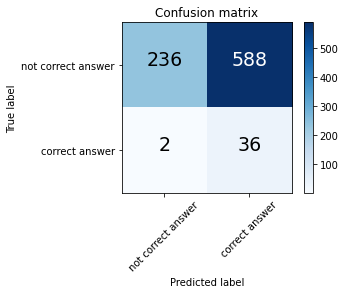

In [ ]:
plot_confusion_matrix(y_test, y_pred, ['not correct answer', 'correct answer'], figsize=(5, 4))

In [ ]:
y_test.value_counts()

False    824
True      38
Name: isAnswer, dtype: int64

In [ ]:
y_pred_Series = pd.Series(y_pred)

In [ ]:
y_pred_Series.value_counts()

True     624
False    238
dtype: int64

In [ ]:
predictorPickleName = 'Data/nb-predictor.pkl'
dumpPickle(predictorPickleName, predictor)